In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import json

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'

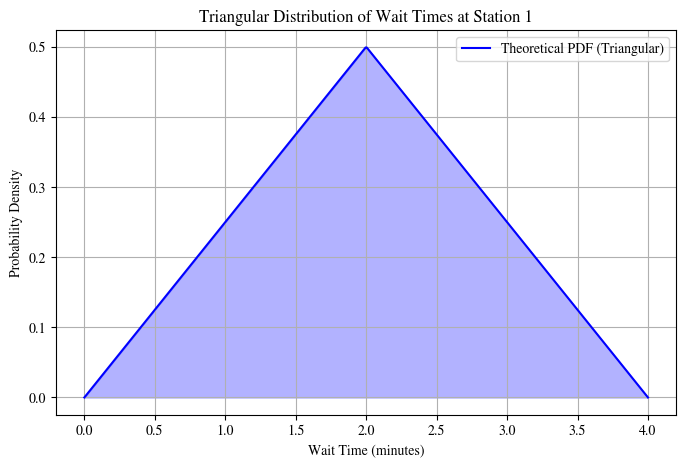

In [13]:
# Define the triangular distribution for wait times
# It's symmetric on [0, 4] with mode at 2

x = np.linspace(0, 4, 500)
pdf = np.where(x <= 2, x / 4, (4 - x) / 4)

# Plot the theoretical distribution
plt.figure(figsize=(8, 5))
plt.plot(x, pdf, label="Theoretical PDF (Triangular)", color='blue')
plt.fill_between(x, pdf, alpha=0.3, color='blue')
plt.title("Triangular Distribution of Wait Times at Station 1")
plt.xlabel("Wait Time (minutes)")
plt.ylabel("Probability Density")
plt.grid(True)
plt.legend()
plt.show()

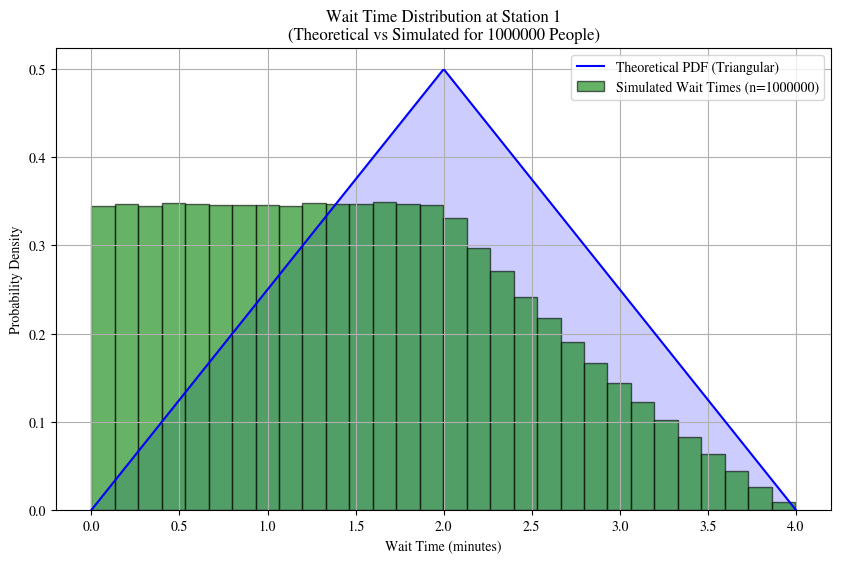

Mean Wait Time: 1.50 minutes
Standard Deviation of Wait Times: 0.93 minutes


In [21]:
# Simulate wait times for 1000 people
simulated_waits = []
for _ in range(1000000):
    interarrival_time = np.random.uniform(2, 4)
    arrival_offset = np.random.uniform(0, interarrival_time)  # Residual life
    simulated_waits.append(interarrival_time - arrival_offset)

simulated_waits = np.array(simulated_waits)

# Plot theoretical and 100 simulated wait times
plt.figure(figsize=(10, 6))

# Plot theoretical PDF
plt.plot(x, pdf, label="Theoretical PDF (Triangular)", color='blue')
plt.fill_between(x, pdf, alpha=0.2, color='blue')

# Histogram of 100 simulated wait times
plt.hist(simulated_waits, bins=30, density=True, alpha=0.6, color='green', edgecolor='black', label="Simulated Wait Times (n=1000000)")

# Plot formatting
plt.title("Wait Time Distribution at Station 1\n(Theoretical vs Simulated for 1000000 People)")
plt.xlabel("Wait Time (minutes)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)

plt.show()

# Return basic statistics
mean_wait = simulated_waits.mean()
print(f"Mean Wait Time: {mean_wait:.2f} minutes")
std_wait = simulated_waits.std()
print(f"Standard Deviation of Wait Times: {std_wait:.2f} minutes")

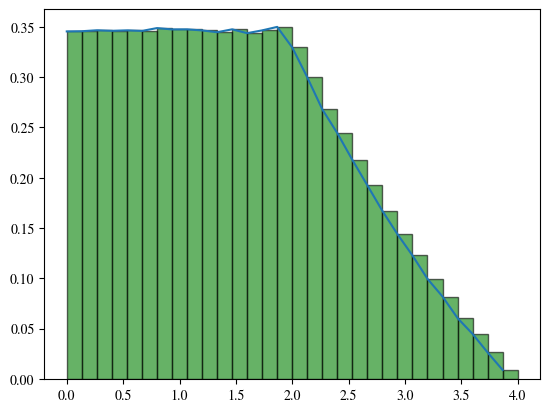

In [17]:
counts, bins, _ = plt.hist(simulated_waits, bins=30, density=True, alpha=0.6,
                           color='green', edgecolor='black', label="Simulated Wait Times (n=1000000)")

#`counts`: Contains the frequency of data points in each bin.
#`bins`: Contains the edges of the bins.

plt.plot(bins[:-1], counts, label="PDF from Histogram") # bins[:-1] because bins has one extra element
plt.show()